In [9]:
import gmt
import numpy as np

In [10]:
lon, lat = np.loadtxt("hotspots.txt", usecols=[0, 1], unpack=True)

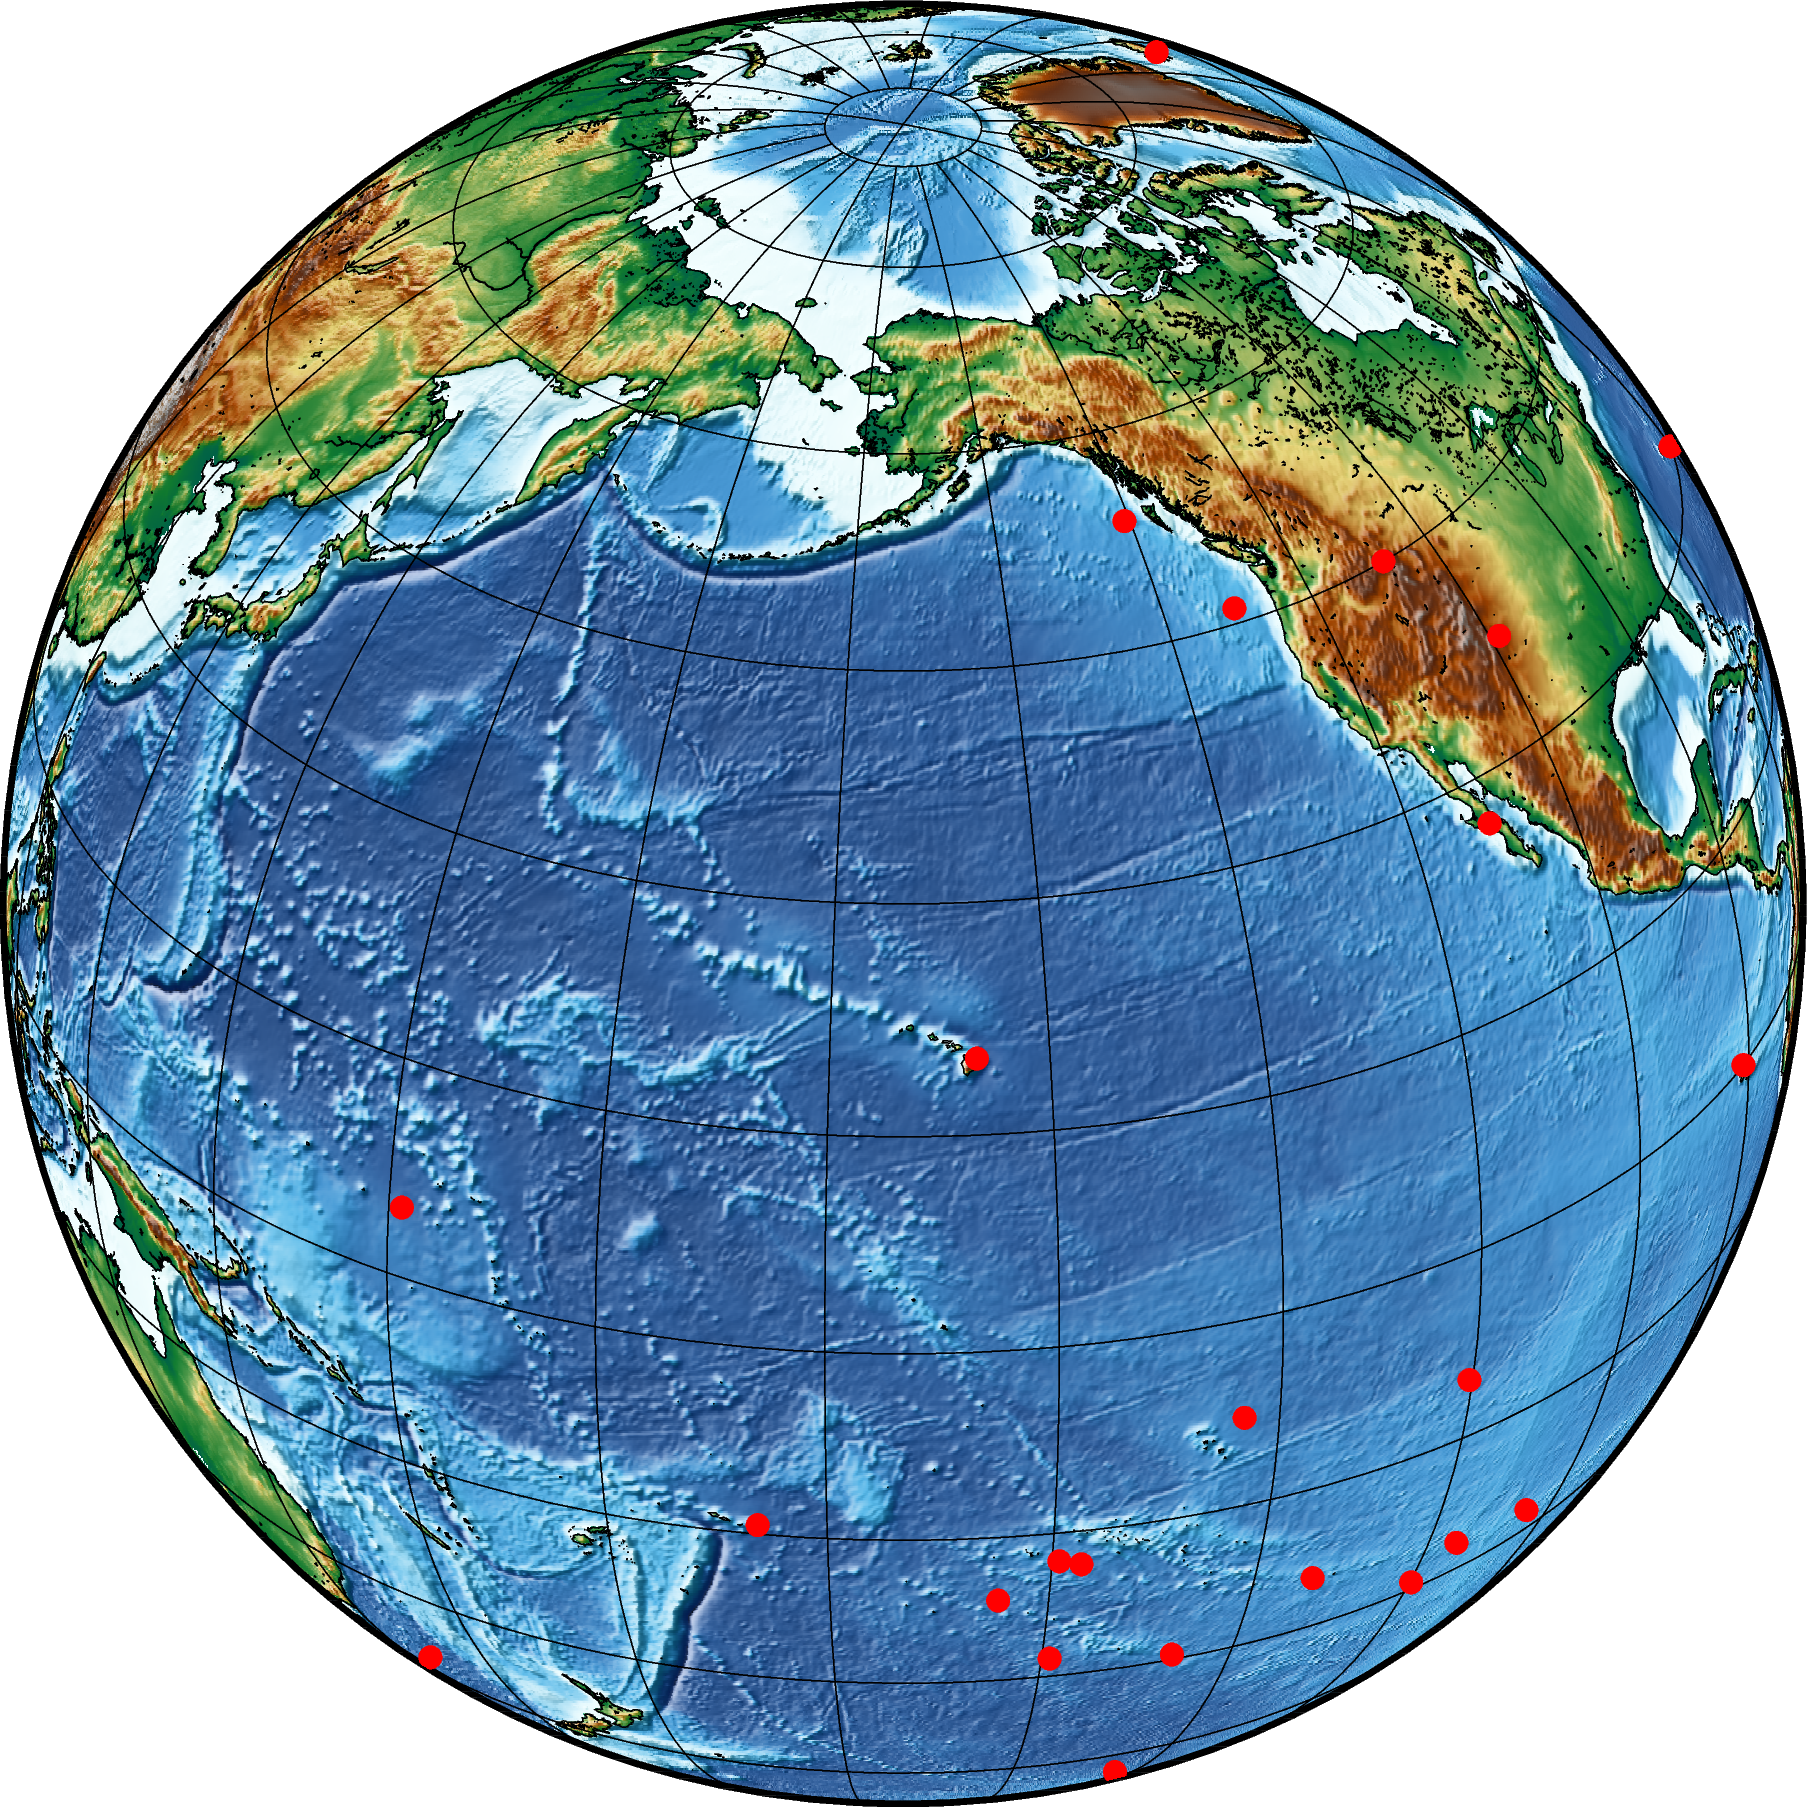

In [11]:
fig = gmt.Figure()
fig.grdimage("@earth_relief_10m", projection="G200/30/6i", cmap="geo", shading=True)
fig.coast(shorelines=True, frame="afg")
fig.plot(x=lon, y=lat, style="c0.2c", color="red")
fig.show()

## An example of the clib interface

In [13]:
grid = gmt.datasets.load_earth_relief()
grid

<xarray.DataArray 'z' (lat: 181, lon: 361)>
array([[ 2762.,  2762.,  2762., ...,  2762.,  2762.,  2762.],
       [ 2983.,  2980.,  2977., ...,  2989.,  2986.,  2983.],
       [ 3074.,  3074.,  3074., ...,  3072.,  3073.,  3074.],
       ...,
       [-3727., -3715., -3706., ..., -3759., -3742., -3727.],
       [-2294., -2282., -2271., ..., -2322., -2308., -2294.],
       [-4181., -4181., -4181., ..., -4181., -4181., -4181.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
Attributes:
    long_name:     z
    actual_range:  [-8425.  5551.]

In [19]:
with gmt.clib.Session() as ses:
    with ses.virtualfile_from_grid(grid) as f_in:
        print(f_in)
        with gmt.helpers.GMTTempFile() as f_out:
            ses.call_module("grdinfo", "{} ->{}".format(f_in, f_out.name))
            print("\n", f_out.read(), sep="")

@GMTAPI@-000000

: Title: 
: Command: 
: Remark: 
: Gridline node registration used [Cartesian grid]
: Unrecognized grid file format! Probably not a GMT grid
: x_min: -180 x_max: 180 x_inc: 1 name: x n_columns: 361
: y_min: -90 y_max: 90 y_inc: 1 name: y n_rows: 181
: z_min: -8425 z_max: 5551 name: z
: scale_factor: 1 add_offset: 0

